In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_dir = "C:\\Users\\kajal\\OneDrive\\Desktop\\DATASET\\TRAIN"
test_dir = "C:\\Users\\kajal\\OneDrive\\Desktop\\DATASET\\TEST"

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,  
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

Found 1994 images belonging to 20 classes.
Found 266 images belonging to 20 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='softmax')  
])

In [13]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [14]:
epochs = 50
batch_size = 32

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping])


Epoch 1/50



 5/63 [=>............................] - ETA: 2:02 - loss: 6.4712 - accuracy: 0.0812

C:\anacon\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


63/63 [==============================] - 154s 2s/step - loss: 3.0874 - accuracy: 0.1299 - val_loss: 2.9032 - val_accuracy: 0.0714
Epoch 2/50
63/63 [==============================] - 154s 2s/step - loss: 2.7574 - accuracy: 0.1284 - val_loss: 2.9112 - val_accuracy: 0.0865
Epoch 3/50
63/63 [==============================] - 147s 2s/step - loss: 2.7642 - accuracy: 0.1234 - val_loss: 2.9175 - val_accuracy: 0.0865
Epoch 4/50
63/63 [==============================] - 145s 2s/step - loss: 2.7462 - accuracy: 0.1384 - val_loss: 2.8841 - val_accuracy: 0.1128
Epoch 5/50
63/63 [==============================] - 145s 2s/step - loss: 2.7027 - accuracy: 0.1484 - val_loss: 2.6785 - val_accuracy: 0.1805
Epoch 6/50
63/63 [==============================] - 145s 2s/step - loss: 2.6417 - accuracy: 0.1625 - val_loss: 2.6578 - val_accuracy: 0.1955
Epoch 7/50
63/63 [==============================] - 244s 4s/step - loss: 2.6050 - accuracy: 0.1710 - val_loss: 2.4364 - val_accuracy: 0.2068
Epoch 8/50
63/63 [======

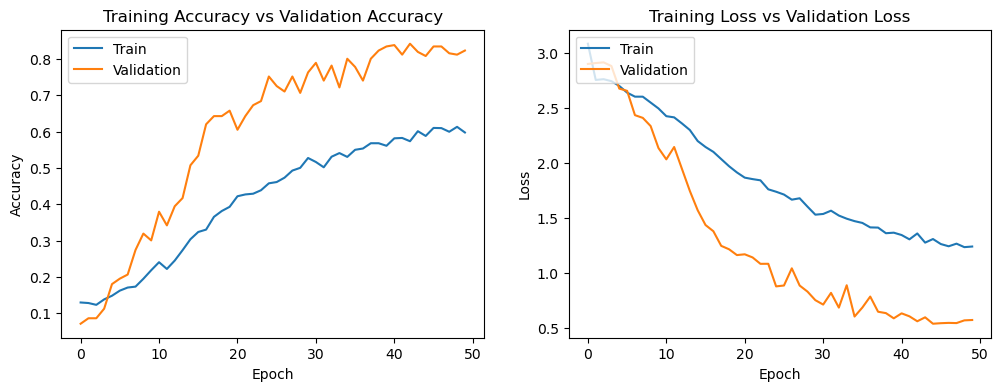

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

# Save the trained model
model.save("yoga_model.h5")

9/9 [==============================] - 8s 915ms/step - loss: 0.5694 - accuracy: 0.8233
final train accuracy = 67.05 , validation accuracy = 82.33


C:\anacon\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import time

# Load the trained model
model = load_model('yoga_model.h5') 

# Initialize mediapipe for holistic detection
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic()

# Initialize OpenCV video capture
cap = cv2.VideoCapture(0)

# Set the time interval for capturing the pose 
pose_capture_interval = 15
pose_update_interval = 60
last_pose_capture_time = time.time()
current_pose_start_time = time.time()

# Initialize variables for displaying pose and accuracy
displayed_pose = None
displayed_accuracy = None
predicted_probs = None

# Initialize variables for warning display
show_warning = False
warning_start_time = 0
warning_duration = 10  # in seconds

def preprocess_user_pose(frame):
    # Resize the frame to the expected input size of the model (224x224)
    resized_frame = cv2.resize(frame, (224, 224))
    # Convert BGR image to RGB
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    # Convert the image to the format expected by the model
    user_pose_image = image.array_to_img(rgb_frame)
    return user_pose_image

def check_alignment(user_landmarks, predicted_class):
    return True

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Convert BGR frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform holistic detection
    results = holistic.process(rgb_frame)

    if results.pose_landmarks:
        # Draw pose landmarks on the frame
        mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

        current_time = time.time()
        elapsed_capture_time = current_time - last_pose_capture_time
        elapsed_pose_time = current_time - current_pose_start_time

        # Check if it's time to capture a new pose
        if elapsed_capture_time >= pose_capture_interval:
            # Capture the user's pose every 15 seconds
            user_pose_image = preprocess_user_pose(frame)

            # Make a prediction using the loaded model
            user_pose_array = image.img_to_array(user_pose_image)
            user_pose_array = np.expand_dims(user_pose_array, axis=0)
            user_pose_array /= 255.0  # Normalize pixel values
            predicted_probs = model.predict(user_pose_array)[0]

            # Get the predicted pose class
            predicted_class = np.argmax(predicted_probs)

            # Assuming you have a list of class labels
            class_labels = ['downdog', 'goddess', 'plank', 'tree', 'warrior2', 'Adho Mukha Svanasana', 
                            'Adho Mukha Vrksasana', 'Alanasana', 'Anjaneyasana', 'Ardha Chandrasana', 'Ardha Matsyendrasana', 
                            'Bitilasana ', 'Bakasana', 'Ardha Navasana', 'Ardha Pincha Mayurasana', 'Ashta Chandrasana', 
                            'Baddha Konasana', 'Balasana', 'Camatkarasana', 'Dhanurasana']  
            # Get the name of the predicted pose
            predicted_pose = class_labels[predicted_class]

            # Update the displayed pose and accuracy
            displayed_pose = f'Predicted Pose: {predicted_pose}'
            displayed_accuracy = f'Accuracy: {predicted_probs[predicted_class] * 100:.2f}%'

            # Check alignment and display warning if needed
            is_aligned = check_alignment(results.pose_landmarks.landmark, predicted_class)

            if predicted_probs[predicted_class] < 0.5:
                show_warning = True
                warning_start_time = current_time

            # Update the last pose capture time
            last_pose_capture_time = current_time

        # Check if it's time to update the pose (after 1 minute)
        if elapsed_pose_time >= pose_update_interval:
            current_pose_start_time = current_time

    # Display the frame with the predicted pose and accuracy
    if displayed_pose is not None:
        cv2.putText(frame, displayed_pose, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, displayed_accuracy, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the warning message if needed
    if show_warning:
        cv2.putText(frame, 'Warning: Low Accuracy', (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Holistic Detection', frame)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

# Release video capture
cap.release()
cv2.destroyAllWindows()